Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

**2.--** Compute e imprima el número de registros con datos faltantes.

**3.--** Compute e imprima el número de registros duplicados.

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

**5.--** Compute y grafique el precio primedio diario.

**6.--** Compute y grafique el precio máximo por mes.

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---

In [ ]:
### 1) Leer

In [1]:
import pandas as pd 
import numpy as np 
## definir función para leer
def leer_precios(filename):
    for k in range(10):
        df = pd.read_excel(filename,
                           skiprows = k,
                           usecols = list(range(26)))
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(26)))
            break
        
    return(df)
## 
filenames = !ls precios/*
dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))

In [3]:
dfs2 = pd.concat(dfs, sort=True)

In [4]:
dfs2.shape

(8409, 26)

In [5]:
dfs2.head()

,0,1,10,11,12,13,14,15,16,17,...,23,3,4,5,6,7,8,9,Fecha,Version
0,NaN,1.073,2.827,2.827,2.827,1.074,1.073,1.073,1.073,1.073,...,1.073,1.073,1.073,1.073,1.073,1.073,1.074,1.074,1995-07-20,NaN
1,1.073,1.000,6.000,9.256,9.256,5.000,5.000,1.000,1.000,5.000,...,1.000,1.000,1.000,1.000,5.000,6.000,6.000,6.000,1995-07-21,NaN
2,1.073,1.073,1.303,1.303,1.303,1.303,1.073,1.000,1.000,1.000,...,1.073,1.000,1.000,1.073,1.303,1.303,1.303,1.303,1995-07-22,NaN
3,1.073,1.000,1.000,1.000,1.238,1.238,1.000,0.100,0.100,1.000,...,1.000,1.000,1.000,1.000,0.100,1.000,1.000,1.000,1995-07-23,NaN
4,1.000,1.000,8.845,9.256,3.000,1.073,1.073,1.073,3.000,2.000,...,1.000,1.000,1.000,1.073,3.000,3.000,3.000,3.500,1995-07-24,NaN


In [4]:
dfs1 = pd.melt(dfs2,id_vars='Fecha')

In [5]:
## Datos melt sin la versión
dfs3=dfs2.drop(columns='Version')
data = pd.melt(dfs3,id_vars='Fecha')
data.shape

(201816, 3)

In [6]:
data.head(10)

,Fecha,variable,value
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073
2,1995-07-22,0,1.073
3,1995-07-23,0,1.073
4,1995-07-24,0,1.000
5,1995-07-25,0,0.990
6,1995-07-26,0,0.500
7,1995-07-27,0,0.500
8,1995-07-28,0,0.000
9,1995-07-29,0,1.000


In [ ]:
### 2) Nan

In [106]:
# data[data['value'].isna()]

In [8]:
data[data.isna().any(axis='columns')].shape

(238, 3)

In [9]:
data[data.isna().any(axis='columns')].count()

Fecha        22
variable    238
value         0
dtype: int64

In [ ]:
### 3) Duplicados

In [12]:
data[data.duplicated()].shape

(1951, 3)

In [13]:
data[data.duplicated()].count()

Fecha       1759
variable    1951
value       1759
dtype: int64

In [ ]:
### 4) Quitar NaN y Duplicados

In [10]:
datacorr=data.drop_duplicates().dropna()

In [16]:
datacorr.head()

,Fecha,variable,value
1,1995-07-21,0,1.073
2,1995-07-22,0,1.073
3,1995-07-23,0,1.073
4,1995-07-24,0,1.000
5,1995-07-25,0,0.990


In [21]:
datacorr.shape

(199819, 3)

In [ ]:
### 5) Precio promedio diario

In [11]:
datacorr['mes'] = pd.DatetimeIndex(datacorr['Fecha']).month
datacorr['dia'] = pd.DatetimeIndex(datacorr['Fecha']).day
datacorr['año'] = pd.DatetimeIndex(datacorr['Fecha']).year
datacorr['año-mes'] = datacorr['año'].map(str)+'-'+datacorr['mes'].map(str)

In [20]:
datacorr.head()

,Fecha,variable,value,mes,dia,año,año-mes
1,1995-07-21,0,1.073,7,21,1995,1995-7
2,1995-07-22,0,1.073,7,22,1995,1995-7
3,1995-07-23,0,1.073,7,23,1995,1995-7
4,1995-07-24,0,1.000,7,24,1995,1995-7
5,1995-07-25,0,0.990,7,25,1995,1995-7


In [7]:
PromFecha=datacorr.groupby('Fecha')['value'].mean()
PromFecha.head()

Fecha
1996-02-01    13.903167
1996-02-02    13.559000
1996-02-03    14.524958
1996-02-04     7.166917
1996-02-05     8.333542
Name: value, dtype: float64

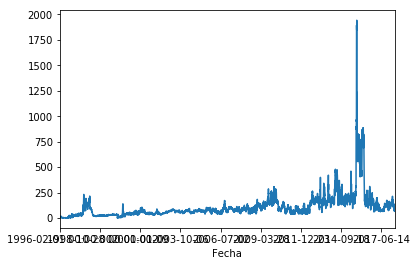

In [22]:
PromFecha.plot()

In [12]:
import matplotlib.pyplot as plt

In [ ]:
## Gráfico por día para todos los años

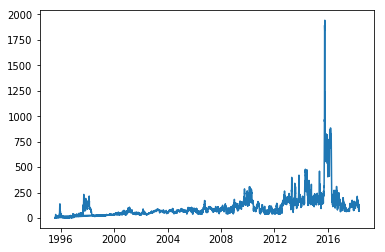

In [23]:
plt.plot(PromFecha)

In [ ]:
## Gráfico por día (juntando años)

In [9]:
PromDia=datacorr.groupby('dia')['value'].mean()
PromDia.head()

dia
1    107.854329
2    108.913259
3    110.298928
4    111.968630
5    111.388790
Name: value, dtype: float64

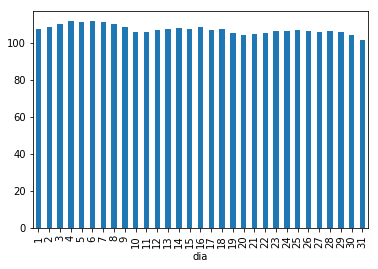

In [25]:
PromDia.plot(kind='bar')

In [ ]:
### 6) Precio máx por mes

In [26]:
MaxAñoMes=datacorr.groupby('año-mes')['value'].max()
MaxAñoMes.head()

año-mes
1995-10     33.700
1995-11    111.907
1995-12    179.730
1995-7      22.500
1995-8      40.000
Name: value, dtype: float64

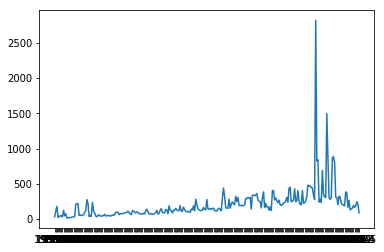

In [89]:
plt.plot(MaxAñoMes)

In [86]:
MaxMes=datacorr.groupby('mes')['value'].max()
MaxMes.head()

mes
1    865.477082
2    869.442024
3    884.836657
4    807.500399
5    686.494571
Name: value, dtype: float64

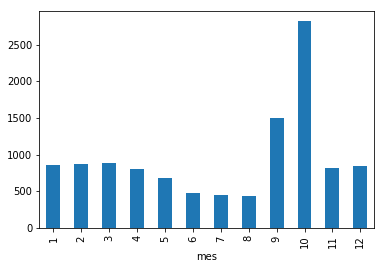

In [87]:
MaxMes.plot(kind='bar')

In [ ]:
### 7) Precio mín mensual

In [90]:
MinMes=datacorr.groupby('mes')['value'].min()
MinMes.head()

mes
1    1.073
2    1.076
3    1.255
4    1.254
5    0.000
Name: value, dtype: float64

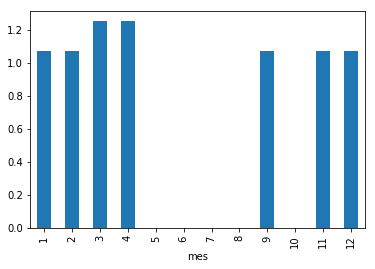

In [91]:
MinMes.plot(kind='bar')

In [ ]:
##8) Gráfico promedio mes y máx mes

In [92]:
PromMes=datacorr.groupby('mes')['value'].mean()
PromMes.head()

mes
1    111.924490
2    125.139288
3    125.732944
4    106.910424
5     91.602250
Name: value, dtype: float64

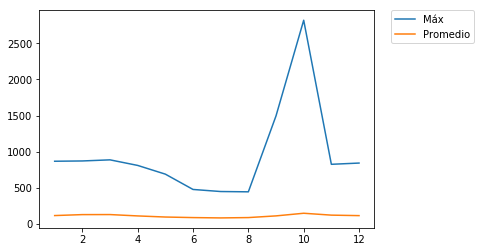

In [98]:
fig = plt.plot(MaxMes, label='Máx')
plt.plot(PromMes, label='Promedio')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
## 9) Histograma días laborales

In [13]:
datacorr['diasemana']=pd.DatetimeIndex(datacorr['Fecha']).dayofweek

In [14]:
laborales=datacorr[datacorr['diasemana']<5]

In [15]:
laborales.head(10)

,Fecha,variable,value,mes,dia,año,año-mes,diasemana
1,1995-07-21,0,1.073,7,21,1995,1995-7,4
4,1995-07-24,0,1.000,7,24,1995,1995-7,0
5,1995-07-25,0,0.990,7,25,1995,1995-7,1
6,1995-07-26,0,0.500,7,26,1995,1995-7,2
7,1995-07-27,0,0.500,7,27,1995,1995-7,3
8,1995-07-28,0,0.000,7,28,1995,1995-7,4
11,1995-07-31,0,0.000,7,31,1995,1995-7,0
12,1995-08-01,0,0.000,8,1,1995,1995-8,1
13,1995-08-02,0,1.073,8,2,1995,1995-8,2
14,1995-08-03,0,1.073,8,3,1995,1995-8,3


In [23]:
# maxlaboralesfecha=laborales.groupby('Fecha')['value'].max()
# maxlaboralesfecha.head()

In [160]:
# maxlaboralesfecha.plot(kind='bar')

In [161]:
# plt.hist(maxlaboralesfecha)

In [21]:
# maxlaboralesfecha.plot(kind='hist')

In [163]:
# maxlaboralesdiasemana=laborales.groupby('diasemana')['value'].max()
# maxlaboralesdiasemana.head()

In [164]:
# maxlaboralesdiasemana.plot(kind='bar')

In [165]:
# maxlaboralesdia=laborales.groupby('dia')['value'].max()
# maxlaboralesdia.head()

In [166]:
# maxlaboralesdia.plot(kind='bar')

In [167]:
# maxlaboralesdia.plot(kind='hist')

In [16]:
aux2=laborales.groupby('Fecha')['value'].max()
aux2.head()

Fecha
1996-02-01    26.50
1996-02-02    28.00
1996-02-05    16.00
1996-02-06    13.55
1996-02-07    11.10
Name: value, dtype: float64

In [17]:
aux3 = pd.DataFrame({'Fecha':aux2.index, 'PrecioMax':aux2.values})
aux3.head()

,Fecha,PrecioMax
0,1996-02-01,26.50
1,1996-02-02,28.00
2,1996-02-05,16.00
3,1996-02-06,13.55
4,1996-02-07,11.10


In [18]:
aux=laborales.copy()
aux['Fecha'] = pd.to_datetime(aux['Fecha'])
aux.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana
1,1995-07-21,0,1.073,7,21,1995,1995-7,4
4,1995-07-24,0,1.000,7,24,1995,1995-7,0
5,1995-07-25,0,0.990,7,25,1995,1995-7,1
6,1995-07-26,0,0.500,7,26,1995,1995-7,2
7,1995-07-27,0,0.500,7,27,1995,1995-7,3


In [19]:
aux5 = pd.merge(aux, aux3, on=['Fecha'], how='inner')
aux5.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PrecioMax
0,1995-07-21,0,1.073,7,21,1995,1995-7,4,16.67
1,1995-07-21,1,1.000,7,21,1995,1995-7,4,16.67
2,1995-07-21,10,6.000,7,21,1995,1995-7,4,16.67
3,1995-07-21,11,9.256,7,21,1995,1995-7,4,16.67
4,1995-07-21,12,9.256,7,21,1995,1995-7,4,16.67


In [20]:
auxMax=aux5[aux5['value']==aux5['PrecioMax']]
auxMax.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PrecioMax
11,1995-07-21,19,16.67,7,21,1995,1995-7,4,16.67
35,1995-07-24,19,22.50,7,24,1995,1995-7,0,22.50
59,1995-07-25,19,1.50,7,25,1995,1995-7,1,1.50
83,1995-07-26,19,8.00,7,26,1995,1995-7,2,8.00
107,1995-07-27,19,1.50,7,27,1995,1995-7,3,1.50


In [26]:
a=auxMax['variable']
a.head()

11     19
35     19
59     19
83     19
107    19
Name: variable, dtype: object

In [91]:
alist=sorted(map(int,a.tolist()))

(array([  41.,   29.,   25.,   20.,   31.,   92.,  134.,  164.,  293.,
         397.,  653., 1039.,  607.,  555.,  774.,  716.,  517.,  422.,
        2776., 5022., 1660.,  619.,  147.,   41.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

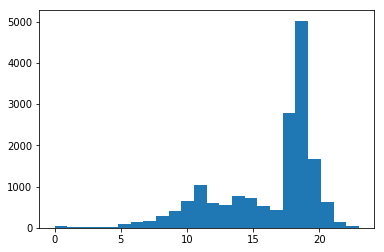

In [92]:
plt.hist(alist, bins=24)

In [56]:
# HoraCount=a.groupby(a).count()
# HoraCount.head()

In [ ]:
## 10) Haga un histograma que muestre a que horas se produce 
##     el máximo precio diario para los días sabado.

In [94]:
sabados=datacorr[datacorr['diasemana']==5]

In [95]:
aux2=sabados.groupby('Fecha')['value'].max()
aux2.head()

Fecha
1996-02-03    25.0
1996-02-10    14.0
1996-02-17    11.5
1996-02-24    12.0
1996-03-02    14.5
Name: value, dtype: float64

In [96]:
aux3 = pd.DataFrame({'Fecha':aux2.index, 'PrecioMax':aux2.values})
aux3.head()

,Fecha,PrecioMax
0,1996-02-03,25.0
1,1996-02-10,14.0
2,1996-02-17,11.5
3,1996-02-24,12.0
4,1996-03-02,14.5


In [98]:
aux=sabados.copy()
aux['Fecha'] = pd.to_datetime(aux['Fecha'])
aux.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana
2,1995-07-22,0,1.073,7,22,1995,1995-7,5
9,1995-07-29,0,1.000,7,29,1995,1995-7,5
16,1995-08-05,0,2.000,8,5,1995,1995-8,5
23,1995-08-12,0,30.000,8,12,1995,1995-8,5
30,1995-08-19,0,1.000,8,19,1995,1995-8,5


In [99]:
aux5 = pd.merge(aux, aux3, on=['Fecha'], how='inner')
aux5.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PrecioMax
0,1995-07-22,0,1.073,7,22,1995,1995-7,5,2.5
1,1995-07-22,1,1.073,7,22,1995,1995-7,5,2.5
2,1995-07-22,10,1.303,7,22,1995,1995-7,5,2.5
3,1995-07-22,11,1.303,7,22,1995,1995-7,5,2.5
4,1995-07-22,12,1.303,7,22,1995,1995-7,5,2.5


In [100]:
auxMax=aux5[aux5['value']==aux5['PrecioMax']]
auxMax.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PrecioMax
11,1995-07-22,19,2.500,7,22,1995,1995-7,5,2.500
13,1995-07-22,20,2.500,7,22,1995,1995-7,5,2.500
28,1995-07-29,12,1.072,7,29,1995,1995-7,5,1.072
37,1995-07-29,20,1.072,7,29,1995,1995-7,5,1.072
50,1995-08-05,10,2.558,8,5,1995,1995-8,5,2.558


In [101]:
a=auxMax['variable']
a.head()

11    19
13    20
28    12
37    20
50    10
Name: variable, dtype: object

In [102]:
alist=sorted(map(int,a.tolist()))

(array([  18.,   11.,   14.,   11.,   12.,   14.,   19.,   41.,   86.,
         130.,  197.,  282.,  255.,  143.,   85.,   55.,   35.,   52.,
         562., 1048.,  484.,  219.,   72.,   27.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

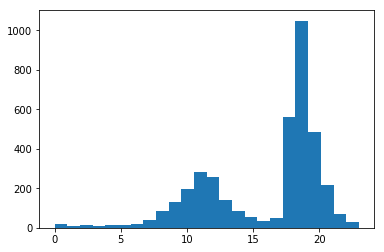

In [103]:
plt.hist(alist, bins=24)

In [ ]:
## 11) Haga un histograma que muestre a que horas se 
##     produce el máximo precio diario para los días domingo.

In [104]:
domingos=datacorr[datacorr['diasemana']==6]

In [105]:
aux2=domingos.groupby('Fecha')['value'].max()
aux2.head()

Fecha
1996-02-04    10.000
1996-02-11    15.000
1996-02-18    11.500
1996-02-25     8.379
1996-03-03     7.500
Name: value, dtype: float64

In [106]:
aux3 = pd.DataFrame({'Fecha':aux2.index, 'PrecioMax':aux2.values})
aux3.head()

,Fecha,PrecioMax
0,1996-02-04,10.000
1,1996-02-11,15.000
2,1996-02-18,11.500
3,1996-02-25,8.379
4,1996-03-03,7.500


In [107]:
aux=domingos.copy()
aux['Fecha'] = pd.to_datetime(aux['Fecha'])
aux.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana
3,1995-07-23,0,1.073,7,23,1995,1995-7,6
10,1995-07-30,0,1.072,7,30,1995,1995-7,6
17,1995-08-06,0,3.000,8,6,1995,1995-8,6
24,1995-08-13,0,35.000,8,13,1995,1995-8,6
31,1995-08-20,0,2.000,8,20,1995,1995-8,6


In [108]:
aux5 = pd.merge(aux, aux3, on=['Fecha'], how='inner')
aux5.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PrecioMax
0,1995-07-23,0,1.073,7,23,1995,1995-7,6,1.238
1,1995-07-23,1,1.000,7,23,1995,1995-7,6,1.238
2,1995-07-23,10,1.000,7,23,1995,1995-7,6,1.238
3,1995-07-23,11,1.000,7,23,1995,1995-7,6,1.238
4,1995-07-23,12,1.238,7,23,1995,1995-7,6,1.238


In [109]:
auxMax=aux5[aux5['value']==aux5['PrecioMax']]
auxMax.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PrecioMax
4,1995-07-23,12,1.238,7,23,1995,1995-7,6,1.238
5,1995-07-23,13,1.238,7,23,1995,1995-7,6,1.238
10,1995-07-23,18,1.238,7,23,1995,1995-7,6,1.238
11,1995-07-23,19,1.238,7,23,1995,1995-7,6,1.238
13,1995-07-23,20,1.238,7,23,1995,1995-7,6,1.238


In [111]:
a=auxMax['variable']
a.head()

4     12
5     13
10    18
11    19
13    20
Name: variable, dtype: object

In [112]:
alist=sorted(map(int,a.tolist()))

(array([  71.,   51.,   47.,   44.,   44.,   45.,   40.,   50.,   76.,
          81.,   94.,  103.,  119.,  106.,   73.,   62.,   49.,   75.,
         478., 1084.,  703.,  348.,  126.,   53.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

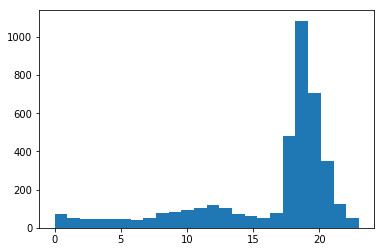

In [113]:
plt.hist(alist, bins=24)

In [ ]:
## 12) Imprima una tabla con la fecha y el valor 
##     más bajo por año del precio de bolsa.

In [114]:
MinAño=datacorr.groupby('año')['value'].min()

In [117]:
tabla = pd.DataFrame({'Año':MinAño.index, 'PrecioMin':MinAño.values})
tabla

,Año,PrecioMin
0,1995,0.000000
1,1996,0.000000
2,1997,10.882310
3,1998,13.847330
4,1999,18.359530
5,2000,21.531167
6,2001,24.822879
7,2002,26.777682
8,2003,37.013438
9,2004,32.252998


In [ ]:
## 13) Haga una gráfica en que se muestre el precio promedio diario 
##     y el precio promedio mensual.

In [152]:
PromFecha=datacorr.groupby('Fecha')['value'].mean()
PromFecha.head()

Fecha
1996-02-01    13.903167
1996-02-02    13.559000
1996-02-03    14.524958
1996-02-04     7.166917
1996-02-05     8.333542
Name: value, dtype: float64

In [153]:
tablaPromFecha = pd.DataFrame({'Fecha':PromFecha.index, 'PromDia':PromFecha.values})
tablaPromFecha.head()

,Fecha,PromDia
0,1996-02-01,13.903167
1,1996-02-02,13.559000
2,1996-02-03,14.524958
3,1996-02-04,7.166917
4,1996-02-05,8.333542


In [154]:
PromMes=datacorr.groupby('año-mes')['value'].mean()
PromMes.head()

año-mes
1995-10    10.445442
1995-11    27.534782
1995-12    68.876234
1995-7      1.540655
1995-8      7.086462
Name: value, dtype: float64

In [155]:
tablaPromAñoMes = pd.DataFrame({'año-mes':PromMes.index, 'PromAñoMes':PromMes.values})
tablaPromAñoMes.head()

,año-mes,PromAñoMes
0,1995-10,10.445442
1,1995-11,27.534782
2,1995-12,68.876234
3,1995-7,1.540655
4,1995-8,7.086462


In [156]:
Tabla13=datacorr.copy()
Tabla13.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana
1,1995-07-21,0,1.073,7,21,1995,1995-7,4
2,1995-07-22,0,1.073,7,22,1995,1995-7,5
3,1995-07-23,0,1.073,7,23,1995,1995-7,6
4,1995-07-24,0,1.000,7,24,1995,1995-7,0
5,1995-07-25,0,0.990,7,25,1995,1995-7,1


In [157]:
Tabla13['Fecha'] = pd.to_datetime(Tabla13['Fecha'])
Tabla13.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana
1,1995-07-21,0,1.073,7,21,1995,1995-7,4
2,1995-07-22,0,1.073,7,22,1995,1995-7,5
3,1995-07-23,0,1.073,7,23,1995,1995-7,6
4,1995-07-24,0,1.000,7,24,1995,1995-7,0
5,1995-07-25,0,0.990,7,25,1995,1995-7,1


In [158]:
Tabla13 = pd.merge(Tabla13, tablaPromFecha, on=['Fecha'], how='inner')
Tabla13 = pd.merge(Tabla13, tablaPromAñoMes, on=['año-mes'], how='inner')
Tabla13.head()

,Fecha,variable,value,mes,dia,año,año-mes,diasemana,PromDia,PromAñoMes
0,1995-07-21,0,1.073,7,21,1995,1995-7,4,4.924333,1.540655
1,1995-07-21,1,1.000,7,21,1995,1995-7,4,4.924333,1.540655
2,1995-07-21,10,6.000,7,21,1995,1995-7,4,4.924333,1.540655
3,1995-07-21,11,9.256,7,21,1995,1995-7,4,4.924333,1.540655
4,1995-07-21,12,9.256,7,21,1995,1995-7,4,4.924333,1.540655


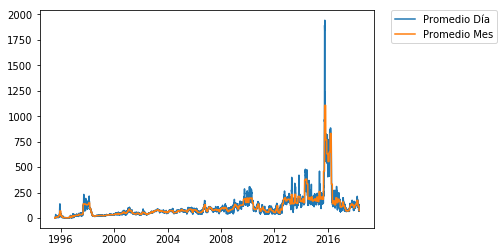

In [160]:
fig = plt.plot(Tabla13['Fecha'],Tabla13['PromDia'], label='Promedio Día')
plt.plot(Tabla13['Fecha'],Tabla13['PromAñoMes'], label='Promedio Mes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)